In [84]:
#Image Operations
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

#Not so important
import pandas as pd

#image operation using skimage
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean

#classification using sklearn
from sklearn.model_selection import train_test_split
from skimage import data, color, feature
from skimage.feature import hog
from sklearn.metrics import confusion_matrix
#load the data
import glob

In [54]:
cd /Users/developer/Documents/Personal/Studies/Sem4/Dataset/

/Users/developer/Documents/Personal/Studies/Sem4/Dataset


In [55]:
!ls

OrangeG1     OrangeG2     OrangeRotten


In [64]:
# Function to create array of images and labels
def loadimage(arr,name_of_folder,category_of_fruit):
    #Because there is not any label in datasets, so you must add the label manually
    label=[]
    #This is the name of the folder, because this is nested file
    png = name_of_folder+"/*.png"
    jpg = name_of_folder+"/*.jpg"
    #Load data per folder
    for file in glob.glob(png)+glob.glob(jpg):
        #read an image as array
        img=np.asarray(plt.imread(file))
        #Append to array
        arr.append(img)
        #Append the label
        label.append(category_of_fruit)
    return arr,label

In [65]:
# Declare lists of data and load the images and label them
G1 = []
G2 = []
Rotten = []
G1,label_G1 = loadimage(G1,"OrangeG1","G1")
G2,label_G2 = loadimage(G2,"OrangeG2","G2")
Rotten,label_Rotten = loadimage(Rotten,"OrangeRotten","Rotten")

In [67]:
# Train and Test split (80-20 split)
train_G1, test_G1, label_train_G1, label_test_G1 = train_test_split(G1, label_G1, test_size=0.20, random_state=42)
train_G2, test_G2, label_train_G2, label_test_G2 = train_test_split(G2, label_G2, test_size=0.20, random_state=42)
train_Rotten, test_Rotten, label_train_Rotten, label_test_Rotten = train_test_split(Rotten, label_Rotten, test_size=0.20, random_state=42)

In [85]:
print("train_G1:"+str(len(train_G1)))
print("test_G1:"+str(len(test_G1)))
print("train_G2:"+str(len(train_G2)))
print("test_G2:"+str(len(test_G2)))
print("train_Rotten:"+str(len(train_Rotten)))
print("test_Rotten:"+str(len(test_Rotten)))

train_G1:539
test_G1:135
train_G2:575
test_G2:144
train_Rotten:322
test_Rotten:81


              Test    Train
    OrangeG1   135    539
    OrangeG2   144    575
 OrangeRotten   81    322

In [77]:
# Create input and output variables by concatenating the three classes
X_test = np.concatenate((test_G1,test_G2,test_Rotten))
X_train = np.concatenate((train_G1,train_G2,train_Rotten))
Y_test = np.concatenate((label_test_G1,label_test_G2,label_test_Rotten))
Y_train = np.concatenate((label_train_G1,label_train_G2,label_train_Rotten))

In [78]:
# Image preprocessing
def preprocessing1(arr):
    arr_prep=[]
    for i in range(np.shape(arr)[0]):
        img=cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        img=resize(img, (100, 100),anti_aliasing=True)
        arr_prep.append(img)
    return arr_prep

def FtrExtractHOG(img):
    ftr,hog_image=hog(img, orientations=8, pixels_per_cell=(16, 16),
            cells_per_block=(1, 1), visualize=True, multichannel=False)
    return ftr,hog_image

def featureExtraction1(arr):
    arr_feature=[]
    hog_images = []
    for i in range(np.shape(arr)[0]):
        ftr,hog_image = FtrExtractHOG(arr[i])
        arr_feature.append(ftr)
        hog_images.append(hog_image)
    return arr_feature,hog_images


In [79]:
#Preprocessing
X_trainp=preprocessing1(X_train)
X_testp=preprocessing1(X_test)
#Feature Extraction 
X_trainftr,X_trainHog=featureExtraction1(X_trainp)
X_testftr,X_testHog=featureExtraction1(X_testp)


/var/folders/z1/_g25m3xn46sgv2901f46wnjc0000gp/T/ipykernel_24439/3222036190.py:11: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ftr,hog_image=hog(img, orientations=8, pixels_per_cell=(16, 16),


Text(0.5, 1.0, 'Feature extracted')

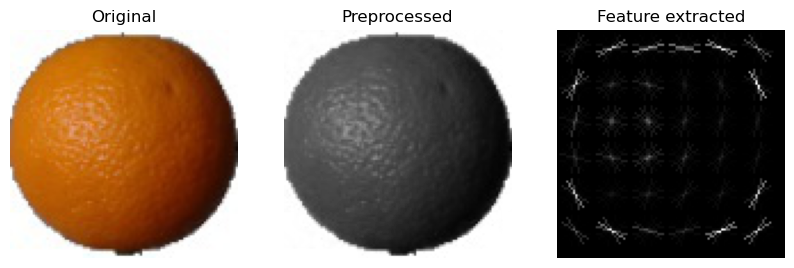

In [80]:
#Sample images of original, preprocessed and Feature extracted stages
# create figure
fig = plt.figure(figsize=(10, 7))
# setting values to rows and column variables
rows = 1
columns = 3

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(X_train[0])
plt.axis('off')
plt.title("Original")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(X_trainp[0],cmap='gray')
plt.axis('off')
plt.title("Preprocessed")

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(X_trainHog[0],cmap='gray')
plt.axis('off')
plt.title("Feature extracted")

In [81]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=11)
knn_clf.fit(X_trainftr, Y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=11, weights='distance')

In [82]:
y_knn_pred = knn_clf.predict(X_testftr)

In [83]:
print(accuracy_score(Y_test, y_knn_pred)*100,'%')

96.38888888888889 %


In [89]:
# Confusion matrix
confusion_matrix(Y_test,y_knn_pred,labels=["G1", "G2", "Rotten"])

array([[129,   1,   5],
       [  0, 144,   0],
       [  5,   2,  74]])

For G1, FPR = 5/(5+144+2+74) = 2%
For G2, FPR = 3/(129+5+5+74+3) = 1%
For Rotten , FPR = 5/(5+129+1+144+5+2) = 2%
             FNR = 7/(7+74) =9%
